## To load the pandas package and start working with it, import the package. The community agreed alias for pandas is pd, so loading pandas as pd is assumed standard practice for all of the pandas documentation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## I imported matplotlib.pyplot as plt for another reason that I will explain later

## pandas supports the integration with many file formats or data sources out of the box (csv, excel, sql, json, parquet,…).
 ## Importing data from each of these data sources is provided by function with the prefix *read_* Similarly, the *to_* methods are used to store data. 

## We will practice by loading a GFF file. We provide the argument comment="#" below so it will skip the first few lines of the file that are not data but just comments, and we will enter in the column names by hand because it is easier than trying to parse them from the file in this case.

In [2]:
# read csv function with arguments to parse the file
gff = pd.read_csv(
    "./NZ_GG770409.gff", 
    sep="\t", 
    header=None,
    comment="#", 
    names=("seqname", "source", "feature", "start",
           "end", "score", "strand", "frame", "attribute"),
)

## Make sure to always have a check on the data after reading it.
## When displaying a DataFrame, the first 5 rows will be shown by default:


In [3]:
gff.head(8)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,NZ_GG770409.1,RefSeq,region,1,6115515,.,+,.,"ID=id0;Dbxref=Greengenes:253191,HMP:0004,taxon..."
1,NZ_GG770409.1,RefSeq,gene,1,288,.,-,.,ID=gene0;Name=HMPREF0004_0003;gbkey=Gene;locus...
2,NZ_GG770409.1,RefSeq,CDS,1,288,.,-,0,ID=cds0;Name=ZP_06684427.1;Parent=gene0;Dbxref...
3,NZ_GG770409.1,RefSeq,gene,316,1767,.,-,.,ID=gene1;Name=HMPREF0004_0004;gbkey=Gene;locus...
4,NZ_GG770409.1,RefSeq,CDS,316,1767,.,-,0,ID=cds1;Name=ZP_06684428.1;Parent=gene1;Note=C...
5,NZ_GG770409.1,RefSeq,gene,1885,4315,.,-,.,ID=gene2;Name=HMPREF0004_0005;gbkey=Gene;locus...
6,NZ_GG770409.1,RefSeq,CDS,1885,4315,.,-,0,ID=cds2;Name=ZP_06684429.1;Parent=gene2;Note=C...
7,NZ_GG770409.1,RefSeq,gene,4408,5016,.,-,.,ID=gene3;Name=HMPREF0004_0006;gbkey=Gene;locus...


## Use the head() method with the required number of rows (in this case 8) as an argument to see the first N rows of a DataFrame (the default is 5).
## If you want to see the last N rows, use the tail() method.
## To see the last two rows, what should we type in the next cell?

## You can check how pandas interpreted each of the column data types  by dtypes attribute.

In [4]:
gff.dtypes

seqname      object
source       object
feature      object
start         int64
end           int64
score        object
strand       object
frame        object
attribute    object
dtype: object

## If you are Interested in a technical summary of the DataFrame, use info().

In [5]:
gff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11591 entries, 0 to 11590
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seqname    11591 non-null  object
 1   source     11591 non-null  object
 2   feature    11591 non-null  object
 3   start      11591 non-null  int64 
 4   end        11591 non-null  int64 
 5   score      11591 non-null  object
 6   strand     11591 non-null  object
 7   frame      11591 non-null  object
 8   attribute  11591 non-null  object
dtypes: int64(2), object(7)
memory usage: 815.1+ KB



## Some of the columns may pique your interest at times. You can select a (some) specific column (s); for example, if you want to see the 'feature' column, you can do so as follows:

In [6]:
features = gff['feature']
features.head()

0    region
1      gene
2       CDS
3      gene
4       CDS
Name: feature, dtype: object

##  A convenient way to filter or subselect part of a data set is to use a mask. You can create a boolean array to act as a mask for an entire column or row by asking a question with a True or False answer and broadcasting it across the row or column. For example, below we ask whether the feature is a CDS, which returns a True or False for every element in the 'feature' column.

In [7]:
# create a boolean mask of the feature column asking 'is it a CDS?'
mask = gff.feature == "CDS"

# show the first 10 values
mask.head(10)

0    False
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: feature, dtype: bool

## We can now apply the mask to the DataFrame as an index, or with.loc or.iloc, and it will select all rows with True, but not those with False. The index (row name) on the right is kept across the entire dataframe, so if you select only CDS, you'll get element 2, 4, 6, 8, and so on.

In [8]:
# use this mask to select only rows that are CDS
CDSs = gff[mask]

# return the first 10 value
CDSs.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
2,NZ_GG770409.1,RefSeq,CDS,1,288,.,-,0,ID=cds0;Name=ZP_06684427.1;Parent=gene0;Dbxref...
4,NZ_GG770409.1,RefSeq,CDS,316,1767,.,-,0,ID=cds1;Name=ZP_06684428.1;Parent=gene1;Note=C...
6,NZ_GG770409.1,RefSeq,CDS,1885,4315,.,-,0,ID=cds2;Name=ZP_06684429.1;Parent=gene2;Note=C...
8,NZ_GG770409.1,RefSeq,CDS,4408,5016,.,-,0,ID=cds3;Name=ZP_06684430.1;Parent=gene3;Note=C...
10,NZ_GG770409.1,RefSeq,CDS,5013,5294,.,-,0,ID=cds4;Name=ZP_06684431.1;Parent=gene4;Note=I...


In [9]:
 # or, we could have written the above code more concisely as a single line:
gff.loc[gff.feature == "CDS"].head()

,seqname,source,feature,start,end,score,strand,frame,attribute
2,NZ_GG770409.1,RefSeq,CDS,1,288,.,-,0,ID=cds0;Name=ZP_06684427.1;Parent=gene0;Dbxref...
4,NZ_GG770409.1,RefSeq,CDS,316,1767,.,-,0,ID=cds1;Name=ZP_06684428.1;Parent=gene1;Note=C...
6,NZ_GG770409.1,RefSeq,CDS,1885,4315,.,-,0,ID=cds2;Name=ZP_06684429.1;Parent=gene2;Note=C...
8,NZ_GG770409.1,RefSeq,CDS,4408,5016,.,-,0,ID=cds3;Name=ZP_06684430.1;Parent=gene3;Note=C...
10,NZ_GG770409.1,RefSeq,CDS,5013,5294,.,-,0,ID=cds4;Name=ZP_06684431.1;Parent=gene4;Note=I...


## In the code cells below we are just returning the filtered DataDrame rather than saving it to a variable so you can easily see the result of the operation. As you can see it is easy to explore the effect of our operations by filtering in various ways and calling the .head() function to show a small part of the result.

In [10]:
gff[gff.feature == "CDS"].head()

,seqname,source,feature,start,end,score,strand,frame,attribute
2,NZ_GG770409.1,RefSeq,CDS,1,288,.,-,0,ID=cds0;Name=ZP_06684427.1;Parent=gene0;Dbxref...
4,NZ_GG770409.1,RefSeq,CDS,316,1767,.,-,0,ID=cds1;Name=ZP_06684428.1;Parent=gene1;Note=C...
6,NZ_GG770409.1,RefSeq,CDS,1885,4315,.,-,0,ID=cds2;Name=ZP_06684429.1;Parent=gene2;Note=C...
8,NZ_GG770409.1,RefSeq,CDS,4408,5016,.,-,0,ID=cds3;Name=ZP_06684430.1;Parent=gene3;Note=C...
10,NZ_GG770409.1,RefSeq,CDS,5013,5294,.,-,0,ID=cds4;Name=ZP_06684431.1;Parent=gene4;Note=I...


In [11]:
# select attributes of those rows
gff[gff.feature == "CDS"]["attribute"].head(5)

2     ID=cds0;Name=ZP_06684427.1;Parent=gene0;Dbxref...
4     ID=cds1;Name=ZP_06684428.1;Parent=gene1;Note=C...
6     ID=cds2;Name=ZP_06684429.1;Parent=gene2;Note=C...
8     ID=cds3;Name=ZP_06684430.1;Parent=gene3;Note=C...
10    ID=cds4;Name=ZP_06684431.1;Parent=gene4;Note=I...
Name: attribute, dtype: object

 ##  you can count the number of genes in the DataFrame in the code cell below.

In [12]:
gff.loc[gff.feature == "gene"].shape[0]

5761

## We can also use the iloc[] attribute to specify the position of the passed integers. Because iloc is integer position-based, you must specify rows and columns by their integer position values (0-based integer position).


## loc is label-based, which means that you have to specify rows and columns based on their row and column labels.

In [13]:
#gff.iloc[rowindex, column index]
gff.iloc[2:5, 3:7]

,start,end,score,strand
2,1,288,.,-
3,316,1767,.,-
4,316,1767,.,-


## What should I write if I want rows 2 to 6 and all the columns?

In [14]:
# 3 is the label of row 4
gff.loc[3]

seqname                                          NZ_GG770409.1
source                                                  RefSeq
feature                                                   gene
start                                                      316
end                                                       1767
score                                                        .
strand                                                       -
frame                                                        .
attribute    ID=gene1;Name=HMPREF0004_0004;gbkey=Gene;locus...
Name: 3, dtype: object

## A DataFrame can be filtered to show only specific rows. For example, if you're looking for samples with a starting position greater than 4408:


In [15]:
above_4408 = gff[gff['start']> 4408]
above_4408.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute
9,NZ_GG770409.1,RefSeq,gene,5013,5294,.,-,.,ID=gene4;Name=HMPREF0004_0007;gbkey=Gene;locus...
10,NZ_GG770409.1,RefSeq,CDS,5013,5294,.,-,0,ID=cds4;Name=ZP_06684431.1;Parent=gene4;Note=I...
11,NZ_GG770409.1,RefSeq,gene,5569,5838,.,+,.,ID=gene5;Name=coxA;gbkey=Gene;gene=coxA;locus_...


## Pandas plots your data using Matplotlib's power. You can select the appropriate plot type (scatter, bar, boxplot, etc.) based on your data.
## I've brought two different plot types, but there are many more. If you want to see them, go to this [website](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:ylabel='Frequency'>

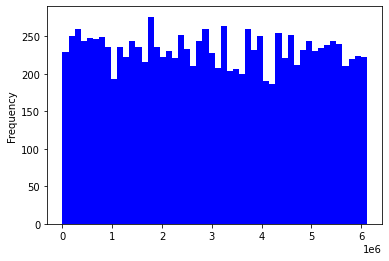

In [16]:
gff['start'].plot(kind='hist', bins = 50, color="b")

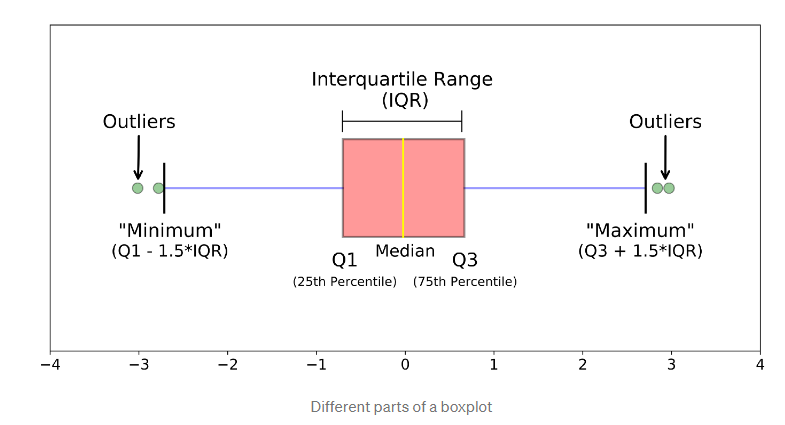

In [17]:
from IPython import display
display.Image("boxplot.png")

<AxesSubplot:>

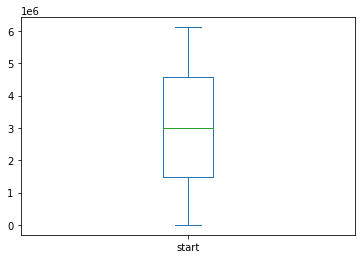

In [18]:
gff['start'].plot.box()

##  You can use Pandas library to generate basic statistical insights from data. For example, you can compute mean, standard deviation, correlation, minimum and maximum values, and so on.
## Here, the mean of the starting positions is computed.

In [19]:
gff['start'].mean()

3023697.813734794

## Find maximum and minimum of starting positions

## What is the median of the starting and ending positions?

In [20]:
gff[['start','end']].median()

start    2989232.0
end      2991801.0
dtype: float64

## Some basic statistics are shown here. 

In [21]:
gff['start'].describe()

count    1.159100e+04
mean     3.023698e+06
std      1.772444e+06
min      1.000000e+00
25%      1.488480e+06
50%      2.989232e+06
75%      4.574117e+06
max      6.113694e+06
Name: start, dtype: float64

## value_counts() function returns object containing counts of unique values.The number of genes, CDSs, tRNAs, and so on can be seen here.


In [22]:
gff['feature'].value_counts()

gene            5761
CDS             5700
exon              61
tRNA              53
binding_site       6
ncRNA              4
rRNA               3
region             1
tmRNA              1
STS                1
Name: feature, dtype: int64

## DataFrames are iterable, as are their columns or rows. Below we iterate over the elements in the 'attribute' column of the rows where feature=='gene'. The iteration is done using a list-comprehension. We can do something which each selected element as it is created during the for-loop that is happening within the list-comprehension. Here, because the selected elements are strings, we perform a string operation, .split(), to split the string every time a semi-colon appears. The result is a list of lists of the items in the string that were split.

##  We operated on a DataFrame column full of strings and got in return a list of lists of strings! This is why it is important to understand the object types in Python, since it allows you to understand how and why this was possible.

In [23]:
# split the string objects of those attribute rows
[i.split(";") for i in gff[gff.feature == "gene"]["attribute"].head()]

[['ID=gene0',
  'Name=HMPREF0004_0003',
  'gbkey=Gene',
  'locus_tag=HMPREF0004_0003',
  'partial=true'],
 ['ID=gene1',
  'Name=HMPREF0004_0004',
  'gbkey=Gene',
  'locus_tag=HMPREF0004_0004'],
 ['ID=gene2',
  'Name=HMPREF0004_0005',
  'gbkey=Gene',
  'locus_tag=HMPREF0004_0005',
  'partial=true'],
 ['ID=gene3',
  'Name=HMPREF0004_0006',
  'gbkey=Gene',
  'locus_tag=HMPREF0004_0006'],
 ['ID=gene4',
  'Name=HMPREF0004_0007',
  'gbkey=Gene',
  'locus_tag=HMPREF0004_0007']]

## The functions of pandas are not limited to those I've listed. If you're keen to know, you can learn more by visiting this  [website](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html#)  or reading Chapter 5 of the book (Python for Data Analysis-DATA WRANGLING WITH PANDAS, NUMPY, AND IPYTHON-, Wes McKinney ) I'll send you.


# gffpandas library

## The Python library gffpandas ([gffpandas tutorial]( https://gffpandas.readthedocs.io/en/latest/tutorial.html#)  ) facilitates the work with GFF3 files. Thereby, different conditions can be choosen to process the annotation data, as e.g. to retain only the entries of a specific feature. The big advantages are that several functions and thus options, can be combined and that a GFF3 file or even csv or tsv file can be returned. 